### Computational Guided Inquiry (Topper, 2022; adapted to Python by Neshyba, 2023)

# The Heat (Capacity) Is On$^{1,2}$

## Introduction
In this project you’ll use Python to predict the enthalpy of a combustion reaction as a function of temperature. Qualitatively, we know that combustion reactions are exothermic. As the combustion temperature increases, does the exothermicity increase, decrease, or stay pretty much the same? This project will answer that question, at least for one compound, by making the estimate two different ways -one highly approximate way, and one very accurate way.

## The *KL1* method
The simplest way to do this is to use *Kirchoff’s Law*$^3$ which is described on pp. 107-109 of Chang and Thoman. Starting with the standard enthalpy of reaction (at 298 K), one can predict how it changes by using heat capacities for the products and reactants. The textbook makes an approximation to Kirchoff’s Law by assuming that the heat capacities of products and reactants are constant and equal to their values at 298 K. We’ll call this “Kirchoff’s Law 1” (*KL1*). See Example 3.11 for how this works, using heat capacity data from Appendix B of the textbook.

## The *KL2* method
A second way is to *not* assume that the heat capacities are constants and integrate the temperature-dependent heat capacity as a function of temperature from 298 K to each particular temperature of interest. This gives rise to a temperature-dependent correction to the enthalpy of formation for each reactant and product that depends nonlinearly on the temperature change. These corrections are then used in the same way that enthalpies of formations are used, to come up with a correction to the enthalpy of combustion at each temperature. This way of doing things will be called “Kirchoff’s Law 2” (*KL2*). 

## The NIST data repository and the Shomate Equation
Both these methods require that you look up heat capacities for the compounds in your reaction. Probably the most convenient and reliable place to find appropriate functions is the NIST Chemistry Webbook. See https://webbook.nist.gov/chemistry/ . If you use the Search by Formula tool and search for $O_2$, (O2) you’ll see that you can scroll down and click on a link entitled “Gas phase thermochemistry data.” You’ll see an entry called the Shomate Equation and a table of its parameters, which are used together to predict the heat capacity as a function of temperature above 100 K. The formula is straightforward and can be integrated analytically – and in fact this page has already done that for you and shows the result as a formula for (H-H298.15). This quantity is the temperature correction to the enthalpy of formation for $O_2$, defined as Hcorr (T) = (H-H298.15). If you can find correction formulas like this one for all reactants and products you can use them as given to predict the enthalpy of formation as a function of temperature; otherwise you will have to figure out the formulas yourself.

Be careful - note that the coefficients you need to use are different for the range (100 K, 700 K) and (700 K, 2000 K) and (2000 K, 6000 K), so you’ll need to switch from one set to the other as the temperature increases. Also note the definition of t in the equation, which is not the same as T.... Finally, you may find it interesting to use the site’s built in plotter to display the heat capacity of $O_2$ as a function of temperature. This shows how the thermal activation of excited vibrational states affects the heat capacity of $O_2$, as explained in Chapter 2.

## The idea of this exercise
You will be assigned a compound and you will predict its enthalpy of combustion as a function of temperature. For simplicity, all reactants and products (including $H_2O$) will be assumed to be in the gas phase. Make sure that you take this into account when calculating the enthalpy of combustion at (1 bar, 298.15 K). Your calculations will start at 300 K and end at 4000 K, using both of the Kirchoff methods (*KL1* and *KL2*). The result we're going for is a 
well-formatted, titled plot with both curves, labeling the T and Enthalpy axes clearly and indicating the units (K and kJ/mole), like the one shown in Fig. 1 below. 

<p style='text-align: center;'>
<img src="http://webspace.pugetsound.edu/facultypages/nesh/Notebook/cycle1.png" height="400" width="400"/>

__Figure 1__. Indicator diagram showing a Carnot cycle acting as a heat engine. 
</p>

## Deliverables
1. Submit this Notebook in the usual way.
2. The project requires a brief report (this need only be 2-3 pages) in which you will explain how you did your calculations and clearly document all sources that you used to obtain data and information. This should be in the form (Introduction, Methods, Results and Discussion, References); no Abstract or Conclusion sections are needed. In the introduction, make sure to include the balanced combustion reaction for your compound as well as the enthalpy of combustion and molar heat capacities of all reactants and products at (1 bar, 298.15 K). Your writing should be easy for me to read and understand, without using informal language. Describe whether the two methods agree with one another well or poorly throughout the temperature range. Your plot should be included in this report.

## Python-specific learning goals
1. I can create named variables that contain single numbers, as well as variables that contain arrays of numbers.
1. I know how to use tailor-made Python functions.
1. I can plot and annotate multiple curves on the same graph.

## Thermodynamic-related learning goals
1. I can explain how the Shomate Equation works, and use it to predict corrections to the enthalpy of a reaction.
1. I can describe assumptions built into the *KL1* and *KL2* methods.
1. I can use the *KL1* and *KL2* methods to predict the enthalpy of reactions that take place under conditions other than the standard-state temperature.

## References
1. With apologies to Glenn Frey. See https://www.youtube.com/watch?v=uZD8HKVKneI
1. This module was developed by R.Q. Topper solely for use at the Cooper Union. Copyright 2021; all rights reserved. Version 1.0; last edited March 6, 2021.
1. This is perhaps more precisely referred to as “Kirchoff’s Law of Thermochemistry.” Gustav Kirchoff proposed this idea in 1858. He was a polymath who has had several “laws” named after him, including the one about circuits that you may already know about. See https://en.wikipedia.org/wiki/Kirchhoff%27s_laws (accessed March 7, 2021).

### Importing resources
The cell below gathers some resources we'll need for this exercise. You don't need to change anything, just execute the cell (e.g., using shift-return).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

### Creating a tailor-made Python function
You're no doubt familiar with built-in functions like *exp(x)* and *sin(y)* on your calculator. But what do you do when you have a need for a function that's *not* built-in? Well, in Python you can *create* it! 

The cell below does just that for the *Shomate Equation*. For now, all you need to do is execute the cell so that it'll be available when we need it later in this exercise. 

In [2]:
def getShomate(Hcorr,T,T1,T2,Sdata):
    for i in range(len(T)):
        if T[i] > T1 and T[i] <= T2:
            t = T[i]/1000
            t0 = Sdata[0]*t
            t1 = Sdata[1]*t**2/2
            t2 = Sdata[2]*t**3/3
            t3 = Sdata[3]*t**4/4
            t4 = Sdata[4]/t
            t5 = Sdata[5]
            t6 = Sdata[6]
            t7 = Sdata[7]
            Hcorr[i] = t0 + t1 + t2 + t3 - t4 + t5 - t7
    return Hcorr

### Pause for analysis
In the cell below, explain in your own words what the Shomate equation does. For example, what information goes *into* the equation, and what quantities does it produce? It might help to refer to online sources for this, such as https://s3.studylib.net/store/data/009453117_1-c58939ac0e049a2bda1a1c4395175868.png.

### Creating named variables
Since this exercise will often refer to standard-state conditions, it'll be handy to have variables that contain those numbers -- that way, anytime we want to use them, we just need to refer to the variable name.

In the cell below, we create a variable named P0, that contains the standard-state pressure. Using that as a model, create another variable named T0 (equal to 298.15). 

In [3]:
# Defining the standard-state pressure (variable name P0)
P0 = 1
print('The standard-state pressure is', P0, 'atm')

# Define and print the standard-state temperature (naming the variable T0)
# BEGIN SOLUTION
T0 = 298.15
print('The standard-state temperature is', T0, 'K')
### END SOLUTION

The standard-state pressure is 1 atm
The standard-state temperature is 298.15 K


### Creating named *array* variables
In subsequent cells, we'l also have need for *arrays* of numbers -- for example, temperatures. The cell below shows how to do that using numpy's *np.arange* function. Execute the cell to see how this works. If you like, you can experiment a bit, by changing some the arguments of *np.arange*, executing again, and seeing how the results change.

In [4]:
myarray1 = np.arange(0,10,1); print(myarray1)
myarray2 = np.arange(0,10,2); print(myarray2)
myarray3 = np.arange(300,200,-10); print(myarray3)

[0 1 2 3 4 5 6 7 8 9]
[0 2 4 6 8]
[300 290 280 270 260 250 240 230 220 210]


### Pause for analysis
As you can see from the above cell, np.arange takes three arguments (for myarray1, for example, these were 0, 10, and 1). In the cell below, describe in your own words what these three arguments do.

### BEGIN SOLUTION

1. The first is the starting number of the array.
1. The second is the ending number -- almost (the sequences ends one before that).
1. The third is the interval between values in the array.

### END SOLUTION

### Your turn
In the cell below, use np.arange to define an array of temperatures starting at 300, increasing in steps of 25, ending at 4000. You should print the result to make sure you got the result you wanted!

In [5]:
# Specify an array of temperatures (specifying variable name "T")
### BEGIN SOLUTION
T = np.arange(300,4025,25)
print(T)
### END SOLUTION

[ 300  325  350  375  400  425  450  475  500  525  550  575  600  625
  650  675  700  725  750  775  800  825  850  875  900  925  950  975
 1000 1025 1050 1075 1100 1125 1150 1175 1200 1225 1250 1275 1300 1325
 1350 1375 1400 1425 1450 1475 1500 1525 1550 1575 1600 1625 1650 1675
 1700 1725 1750 1775 1800 1825 1850 1875 1900 1925 1950 1975 2000 2025
 2050 2075 2100 2125 2150 2175 2200 2225 2250 2275 2300 2325 2350 2375
 2400 2425 2450 2475 2500 2525 2550 2575 2600 2625 2650 2675 2700 2725
 2750 2775 2800 2825 2850 2875 2900 2925 2950 2975 3000 3025 3050 3075
 3100 3125 3150 3175 3200 3225 3250 3275 3300 3325 3350 3375 3400 3425
 3450 3475 3500 3525 3550 3575 3600 3625 3650 3675 3700 3725 3750 3775
 3800 3825 3850 3875 3900 3925 3950 3975 4000]


### The KL1 method
The cell below shows how to carry out the KL1 method for the combustion of $C_2 H_4$. You can execute it as-is, but you might want to study it a bit because you'll be doing something similar for your assigned fuel.

52.3 42.9
0.0 29.4
-393.5 37.1
-241.8 33.6
-1322.8999999999999
10.300000000000011


<IPython.core.display.Javascript object>


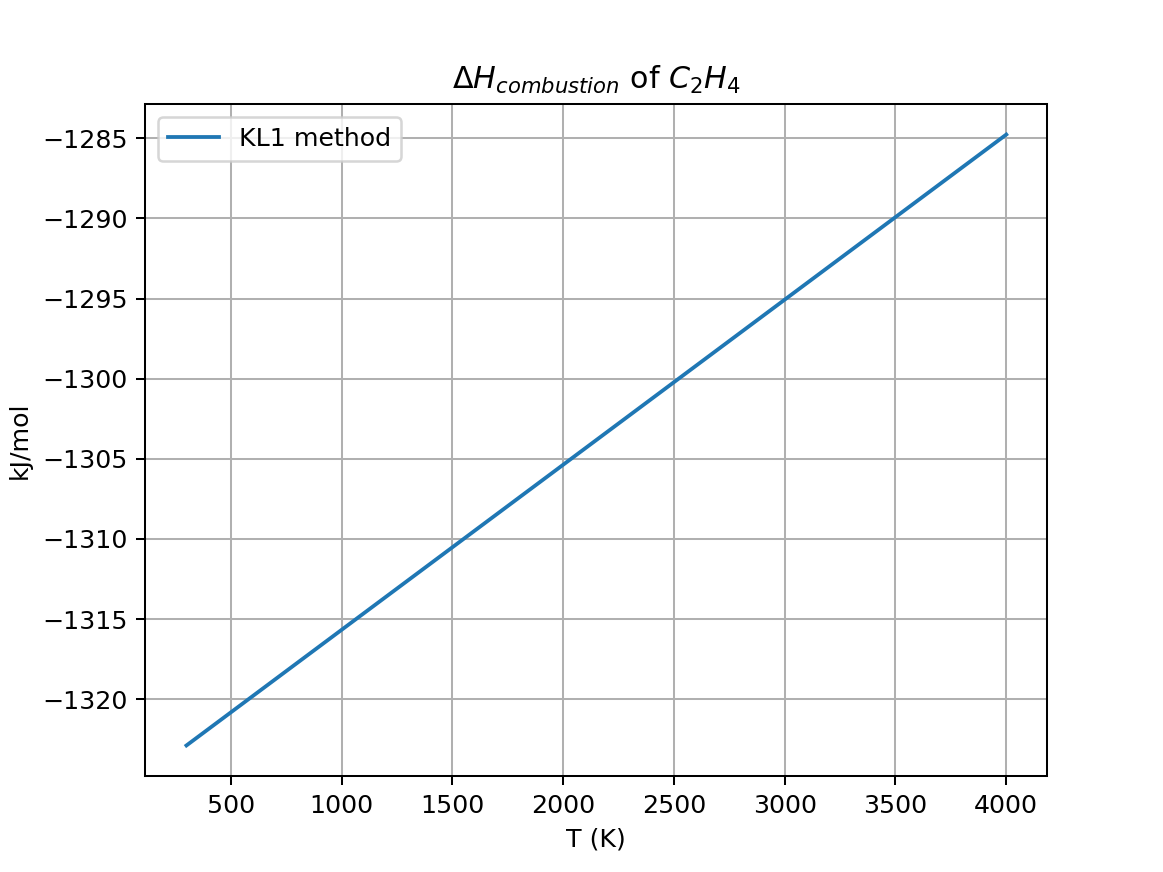

In [6]:
# Load in the standard-state data
DHf_C2H4, Cpm_C2H4 = np.loadtxt('StandardStateInfo_C2H4'); print(DHf_C2H4, Cpm_C2H4)
DHf_O2, Cpm_O2 = np.loadtxt('StandardStateInfo_O2'); print(DHf_O2, Cpm_O2)
DHf_CO2, CPm_CO2 = np.loadtxt('StandardStateInfo_CO2'); print(DHf_CO2, CPm_CO2)
DHf_H2O, CPm_H2O = np.loadtxt('StandardStateInfo_H2O'); print(DHf_H2O, CPm_H2O)

# Calculate the enthalpy of combustion at 298
DHC_298 = 2*DHf_CO2 +2*DHf_H2O -(DHf_C2H4 + 3*DHf_O2)
print(DHC_298)

# Calculate the difference in heat capacities
DCPc = 2*CPm_CO2 +2*CPm_H2O -(Cpm_C2H4 +3*Cpm_O2)
print(DCPc)

# Get the enthalpy of combustion using KL1
DHC1 = DHC_298 + DCPc/1000*(T-T0)

# Plotting
plt.figure()
plt.plot(T,DHC1,label='KL1 method')
plt.grid(True)
plt.xlabel('T (K)')
plt.ylabel('kJ/mol')
plt.title(r'$\Delta H_{combustion}$ of $C_2H_4$')
plt.legend()

### The KL2 method
The cell below shows how to carry out the KL2 method for the combustion of $C_2H_4$. You can execute it as-is, but you might want to study this one too. In particular, some new things that are being used here:

- We're calling our tailor-made function *getHcorr*.
- We're also plotting two curves on the same graph (results of KL1 and KL2), for comparison.

Shomate for C2H4: (8, 2)
Shomate for O2: (8, 3)
Shomate for CO2: (8, 2)
Shomate for H2O: (8, 2)


<IPython.core.display.Javascript object>


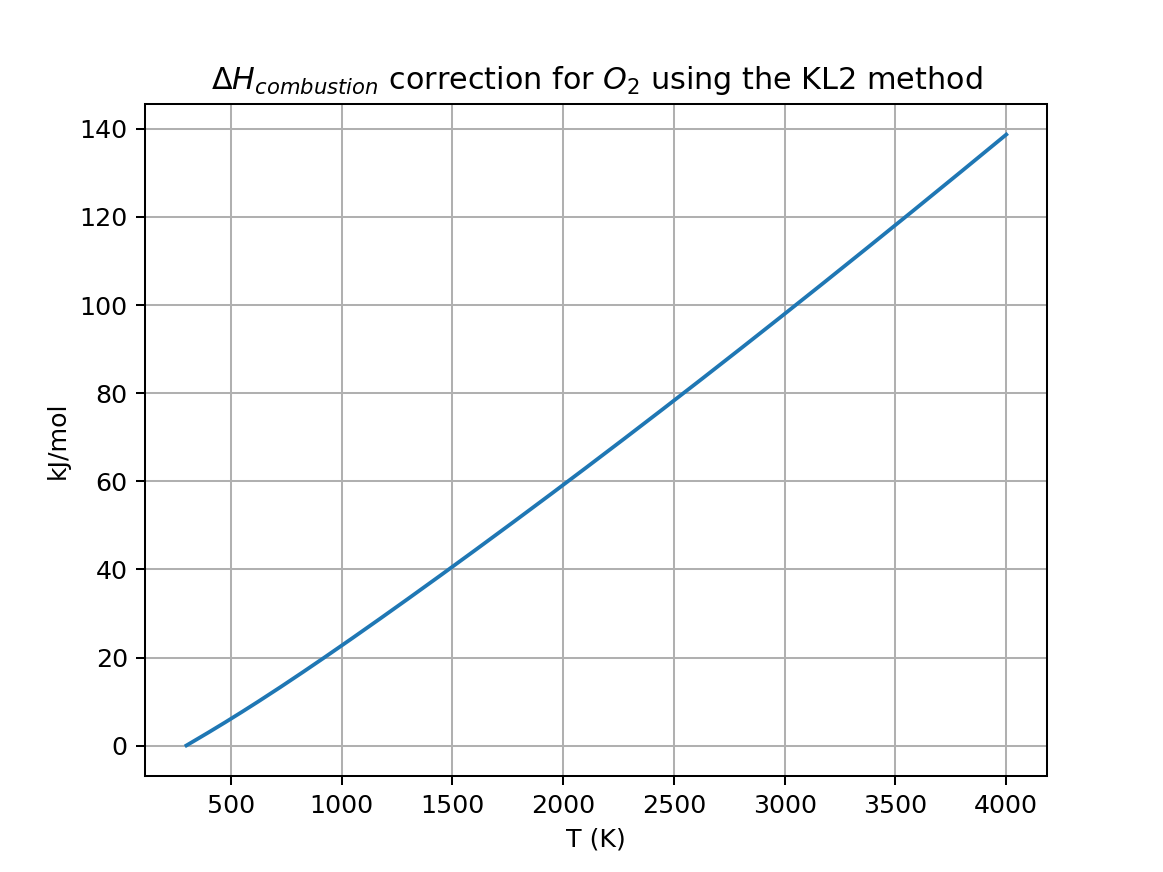

<IPython.core.display.Javascript object>


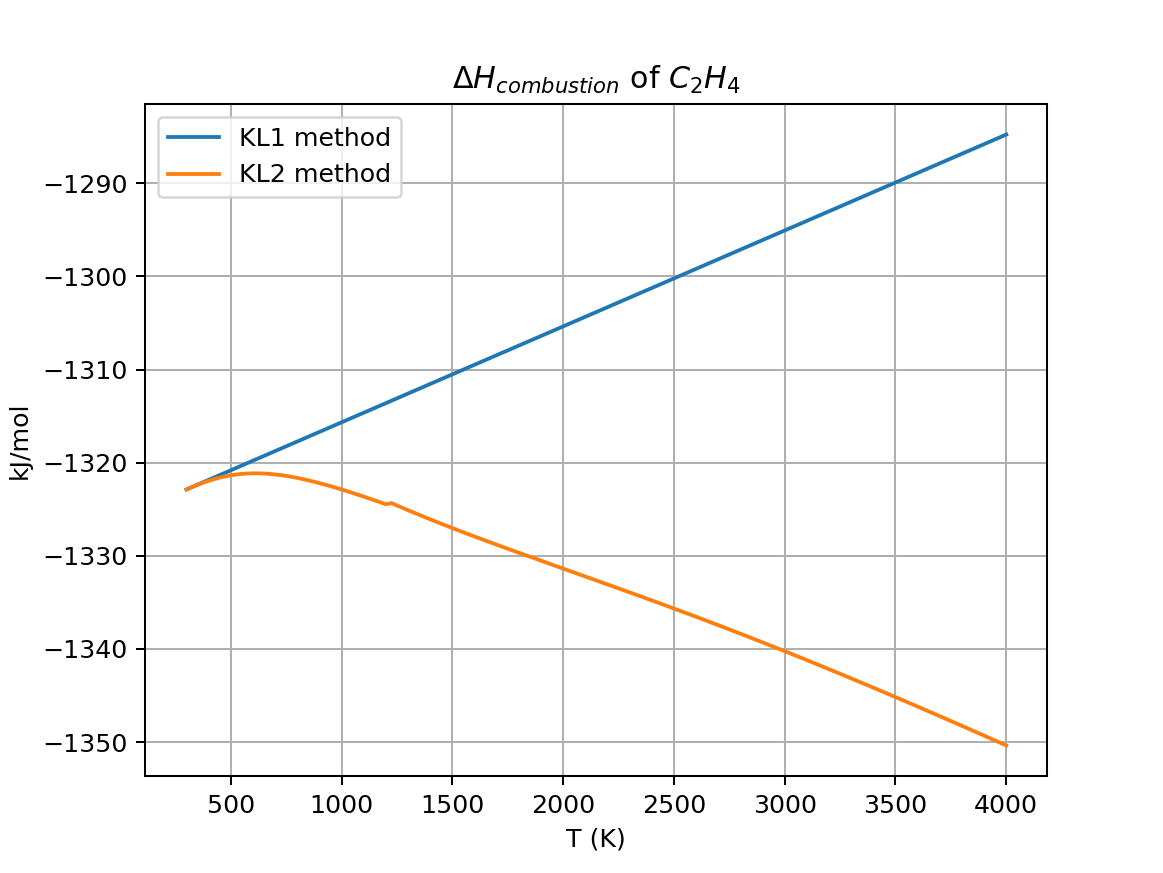

In [7]:
# Load in the Shomate data
Shomate_C2H4 = np.loadtxt('Shomate_C2H4'); print('Shomate for C2H4:', np.shape(Shomate_C2H4))
Shomate_O2 = np.loadtxt('Shomate_O2'); print('Shomate for O2:', np.shape(Shomate_O2))
Shomate_CO2 = np.loadtxt('Shomate_CO2'); print('Shomate for CO2:', np.shape(Shomate_CO2))
Shomate_H2O = np.loadtxt('Shomate_H2O'); print('Shomate for H2O:', np.shape(Shomate_H2O))

# Get corrections for O2
Hcorr_O2 = np.zeros(len(T))
Hcorr_O2 = getShomate(Hcorr_O2,T,100,700,Shomate_O2[:,0])
Hcorr_O2 = getShomate(Hcorr_O2,T,700,2000,Shomate_O2[:,1])
Hcorr_O2 = getShomate(Hcorr_O2,T,2000,6000,Shomate_O2[:,2])

# Plotting those corrections
plt.figure()
plt.plot(T,Hcorr_O2)
plt.grid(True)
plt.xlabel('T (K)')
plt.ylabel('kJ/mol')
plt.title(r'$\Delta H_{combustion}$ correction for $O_2$ using the KL2 method')

# Get corrections for C2H4
Hcorr_C2H4 = np.zeros(len(T))
Hcorr_C2H4 = getShomate(Hcorr_C2H4,T,298,1200,Shomate_C2H4[:,0])
Hcorr_C2H4 = getShomate(Hcorr_C2H4,T,1200,6000,Shomate_C2H4[:,1])

# Get corrections for CO2
Hcorr_CO2 = np.zeros(len(T))
Hcorr_CO2 = getShomate(Hcorr_CO2,T,298,1200,Shomate_CO2[:,0])
Hcorr_CO2 = getShomate(Hcorr_CO2,T,1200,6000,Shomate_CO2[:,1])

# Get corrections for H2O
Hcorr_H2O = np.zeros(len(T))
Hcorr_H2O = getShomate(Hcorr_H2O,T,298,1200,Shomate_H2O[:,0]) # The lower limit should be 500, but this used anyway
Hcorr_H2O = getShomate(Hcorr_H2O,T,1200,6000,Shomate_H2O[:,1])

# Now we'll add 'em all up
DHC2 = DHC_298 + 2*Hcorr_CO2 +2*Hcorr_H2O -(Hcorr_C2H4 +3*Hcorr_O2)

# Plotting
plt.figure()
plt.plot(T,DHC1,label='KL1 method')
plt.plot(T,DHC2,label='KL2 method')
plt.grid(True)
plt.xlabel('T (K)')
plt.ylabel('kJ/mol')
plt.title(r'$\Delta H_{combustion}$ of $C_2H_4$')
plt.legend()

### Your turn: KL1 for your assigned fuel
In the cell below, use the KL1 method to compute the enthalpy of combustion of your assigned fuel, over the same temperature range as done above.

-74.85 35.69
-802.25
9.810000000000016


<IPython.core.display.Javascript object>


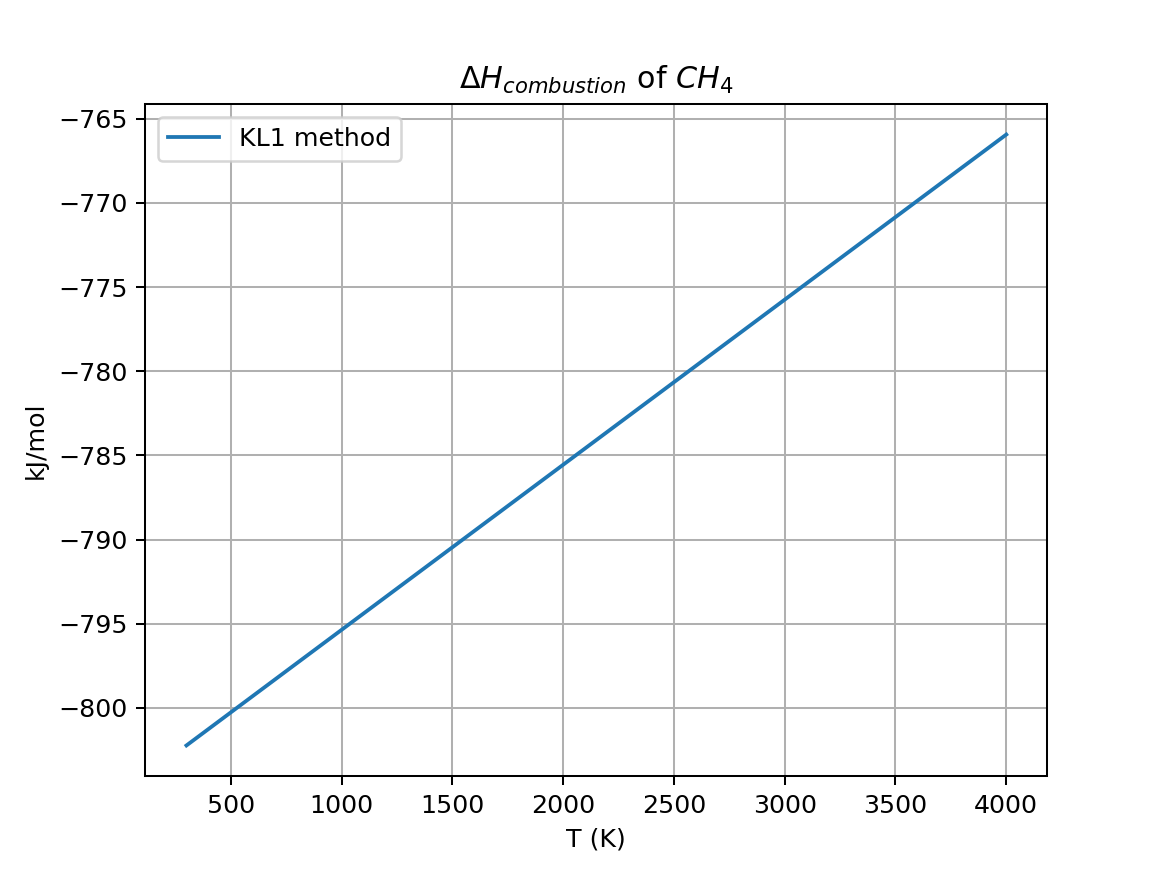

In [8]:
### BEGIN SOLUTION

# Load in the standard-state data for this fuel
DHf_CH4, Cpm_CH4 = np.loadtxt('StandardStateInfo_CH4'); print(DHf_CH4, Cpm_CH4)

# Calculate the enthalpy of combustion at 298
DHC_298 = DHf_CO2 +2*DHf_H2O -(DHf_CH4 + 2*DHf_O2)
print(DHC_298)

# Calculate the difference in heat capacities
DCPc = CPm_CO2 +2*CPm_H2O -(Cpm_CH4 +2*Cpm_O2)
print(DCPc)

# Get the enthalpy of combustion using KL1
DHC1 = DHC_298 + DCPc/1000*(T-T0)

# Plotting
plt.figure()
plt.plot(T,DHC1,label='KL1 method')
plt.grid(True)
plt.xlabel('T (K)')
plt.ylabel('kJ/mol')
plt.title(r'$\Delta H_{combustion}$ of $CH_4$')
plt.legend()

### END SOLUTION

### Your turn: KL2 for your assigned fuel
In the cell below, use the KL2 method to compute the enthalpy of combustion of your assigned fuel, over the same temperature range as done above. Then plot those results along with the KL1 result for your assigned fuel for comparison.

A shortcut: you already have named variables containing Shomate corrections for $O_2$, $CO_2$, and $H_2O$, so the only correction you really need here is for your assigned fuel! (On the other hand, recomputing these values takes negligible computing time, so there's no harm in doing so.)

Shomate for CH4: (8, 2)


<IPython.core.display.Javascript object>


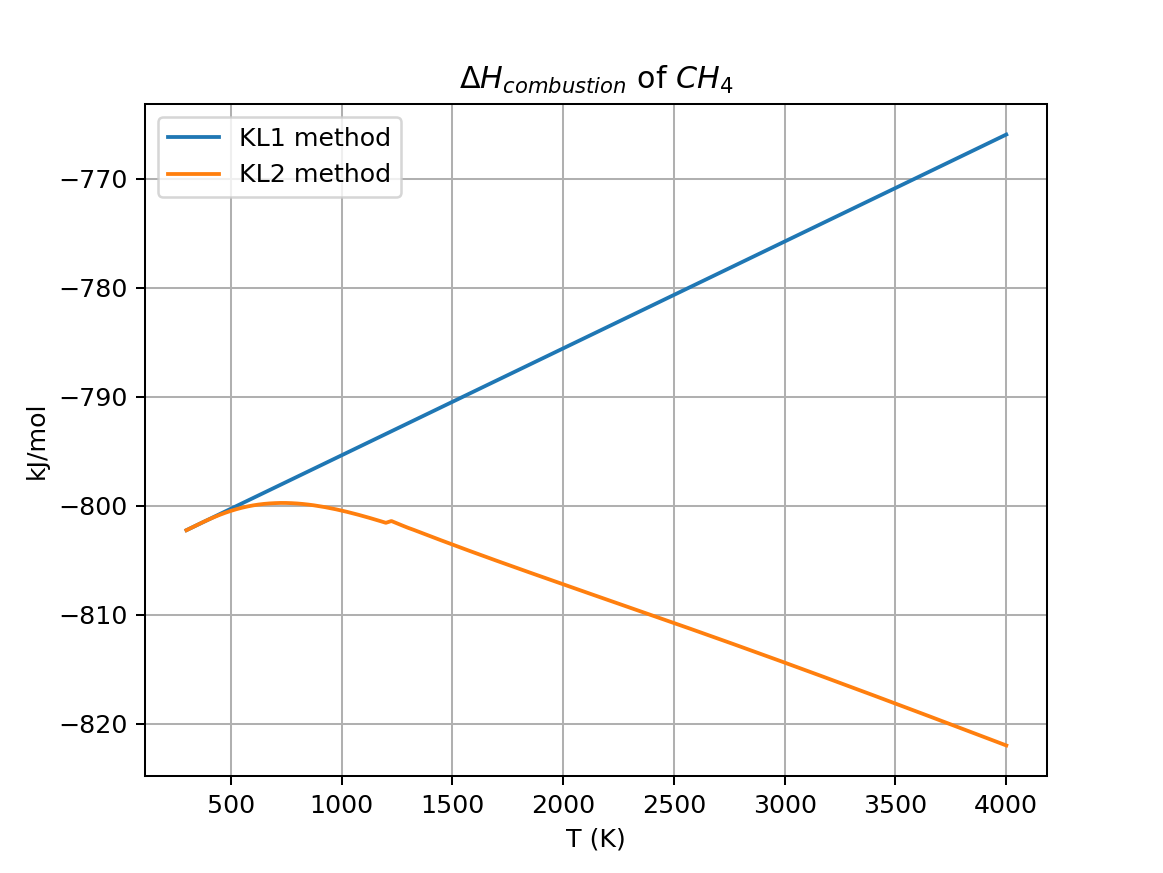

In [9]:
### BEGIN SOLUTION

# Load in the Shomate data
Shomate_CH4 = np.loadtxt('Shomate_CH4'); print('Shomate for CH4:', np.shape(Shomate_CH4))

# Get corrections for CH4
Hcorr_CH4 = np.zeros(len(T))
Hcorr_CH4 = getShomate(Hcorr_CH4,T,298,1300,Shomate_CH4[:,0])
Hcorr_CH4 = getShomate(Hcorr_CH4,T,1300,6000,Shomate_CH4[:,1])

# Now we'll add 'em all up
DHC2 = DHC_298 + Hcorr_CO2 +2*Hcorr_H2O -(Hcorr_CH4 +2*Hcorr_O2)

# Plotting
plt.figure()
plt.plot(T,DHC1,label='KL1 method')
plt.plot(T,DHC2,label='KL2 method')
plt.grid(True)
plt.xlabel('T (K)')
plt.ylabel('kJ/mol')
plt.title(r'$\Delta H_{combustion}$ of $CH_4$')
plt.legend()

### END SOLUTION

### One last refresh and save
We're at the end of the notebook. You should repeat the "Three steps for refreshing and saving your code" you did before. Instead of using the dropdown menu "Cell/Run All Above", however, you may as well use "Cell/Run All".

### Validating
This step will help ensure that you didn't miss something (although it's not a guarantee). Find the "Validate" button and press it. If there are any errors or warnings, fix them.

### Three steps for finishing up
Assuming all this has gone smoothly, there will be three more steps (but read this carefully before carrying them out):
1. Close this notebook using the "File/Close and Halt" dropdown menu
1. Using the Assignments tab, submit this notebook
1. Press the Logout tab of the Home Page